In [1]:
%pip install scikit-learn matplotlib seaborn imbalanced-learn missingno openpyxl category_encoders shap lime


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/var/folders/9d/wpysbld95rg17k1z5kgx_jfh0000gn/T/ipykernel_68097/555797462.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
credit_data = pd.read_excel('Tillit_Data_Science_Tech_Test.xlsx')
credit_data.head()

,borrower_id,loan_amnt,term,emp_title,emp_length,home_ownership,annual_inc,outcome,purpose,addr_state,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,537185,16075.0,60 months,NaN,NaN,MORTGAGE,50289.0,Fully Paid,home_improvement,SC,...,0.0,2.0,95.7,100.0,0.0,0,227376.0,15756.0,11900.0,6000.0
1,1810804,8000.0,36 months,Graydon Head & Ritchey LLP,10+ years,MORTGAGE,64000.0,Fully Paid,debt_consolidation,IN,...,0.0,0.0,100.0,75.0,1.0,0,121881.0,33618.0,13700.0,29400.0
2,388855,23700.0,36 months,Director of IT,3 years,RENT,88000.0,Fully Paid,debt_consolidation,FL,...,0.0,5.0,100.0,10.0,1.0,0,99201.0,58898.0,18700.0,69501.0
3,1137067,1200.0,36 months,NaN,NaN,MORTGAGE,81000.0,Fully Paid,other,NY,...,0.0,4.0,83.3,100.0,0.0,0,203983.0,20609.0,1100.0,26183.0
4,14585,3500.0,36 months,NaN,NaN,RENT,11736.0,Fully Paid,debt_consolidation,WA,...,0.0,1.0,100.0,100.0,1.0,0,16200.0,9459.0,2000.0,0.0


As we can see, there are 78 columns in the data. One of these is outcome, our predicted variable. The others we might want to use as features, or we might want to use only some of them. This depends on what kind of predictive power they add to our model and how explainable we want our model to be. Let's look at the data a little more first.

### Data Preprocessing

In [4]:
credit_data.describe()

,borrower_id,loan_amnt,annual_inc,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,4.102900e+04,41006.000000,4.102900e+04,41029.000000,41029.000000,41029,41029.000000,19875.000000,6816.000000,41029.000000,...,38625.000000,38625.000000,38619.000000,38919.000000,41028.000000,41029.000000,3.862500e+04,3.938000e+04,3.938000e+04,3.862500e+04
mean,1.150215e+06,16410.558211,8.008188e+04,18.929934,0.304565,1998-04-03 14:16:36.933876096,0.739428,34.447145,70.393192,11.772112,...,0.092039,2.371495,94.442378,48.894603,0.133275,0.050452,1.940012e+05,5.288437e+04,2.303843e+04,4.299258e+04
min,1.900000e+01,1000.000000,2.500000e+03,0.000000,0.000000,1948-01-01 00:00:00,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,3.000000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.969490e+05,8156.250000,4.700000e+04,12.560000,0.000000,1994-03-01 00:00:00,0.000000,16.000000,52.000000,8.000000,...,0.000000,1.000000,92.000000,16.700000,0.000000,0.000000,5.325000e+04,2.234350e+04,8.100000e+03,1.394300e+04
50%,1.214344e+06,15000.000000,6.738800e+04,18.860000,0.000000,1999-09-01 00:00:00,0.000000,31.000000,71.000000,11.000000,...,0.000000,2.000000,100.000000,50.000000,0.000000,0.000000,1.298530e+05,3.988300e+04,1.600000e+04,3.203300e+04
75%,1.816166e+06,24000.000000,9.700000e+04,25.100000,0.000000,2003-09-01 00:00:00,1.000000,50.000000,91.000000,15.000000,...,0.000000,3.000000,100.000000,80.000000,0.000000,0.000000,2.805980e+05,6.680075e+04,3.010000e+04,5.818800e+04
max,2.260416e+06,40000.000000,3.300000e+06,49.560000,29.000000,2015-06-01 00:00:00,8.000000,192.000000,120.000000,59.000000,...,29.000000,26.000000,100.000000,100.000000,7.000000,23.000000,4.475891e+06,1.924200e+06,1.105500e+06,1.027358e+06
std,6.951414e+05,9760.781054,6.165221e+04,8.563940,0.848155,NaN,1.020450,21.962064,26.656694,5.581623,...,0.514742,2.124043,8.458709,35.990546,0.378424,0.397772,1.981433e+05,5.167188e+04,2.328772e+04,4.546689e+04


Currently since we have 78 columns, it might be hard to look at the summary statistics for them all. But we can check out the missing values.

<Axes: >

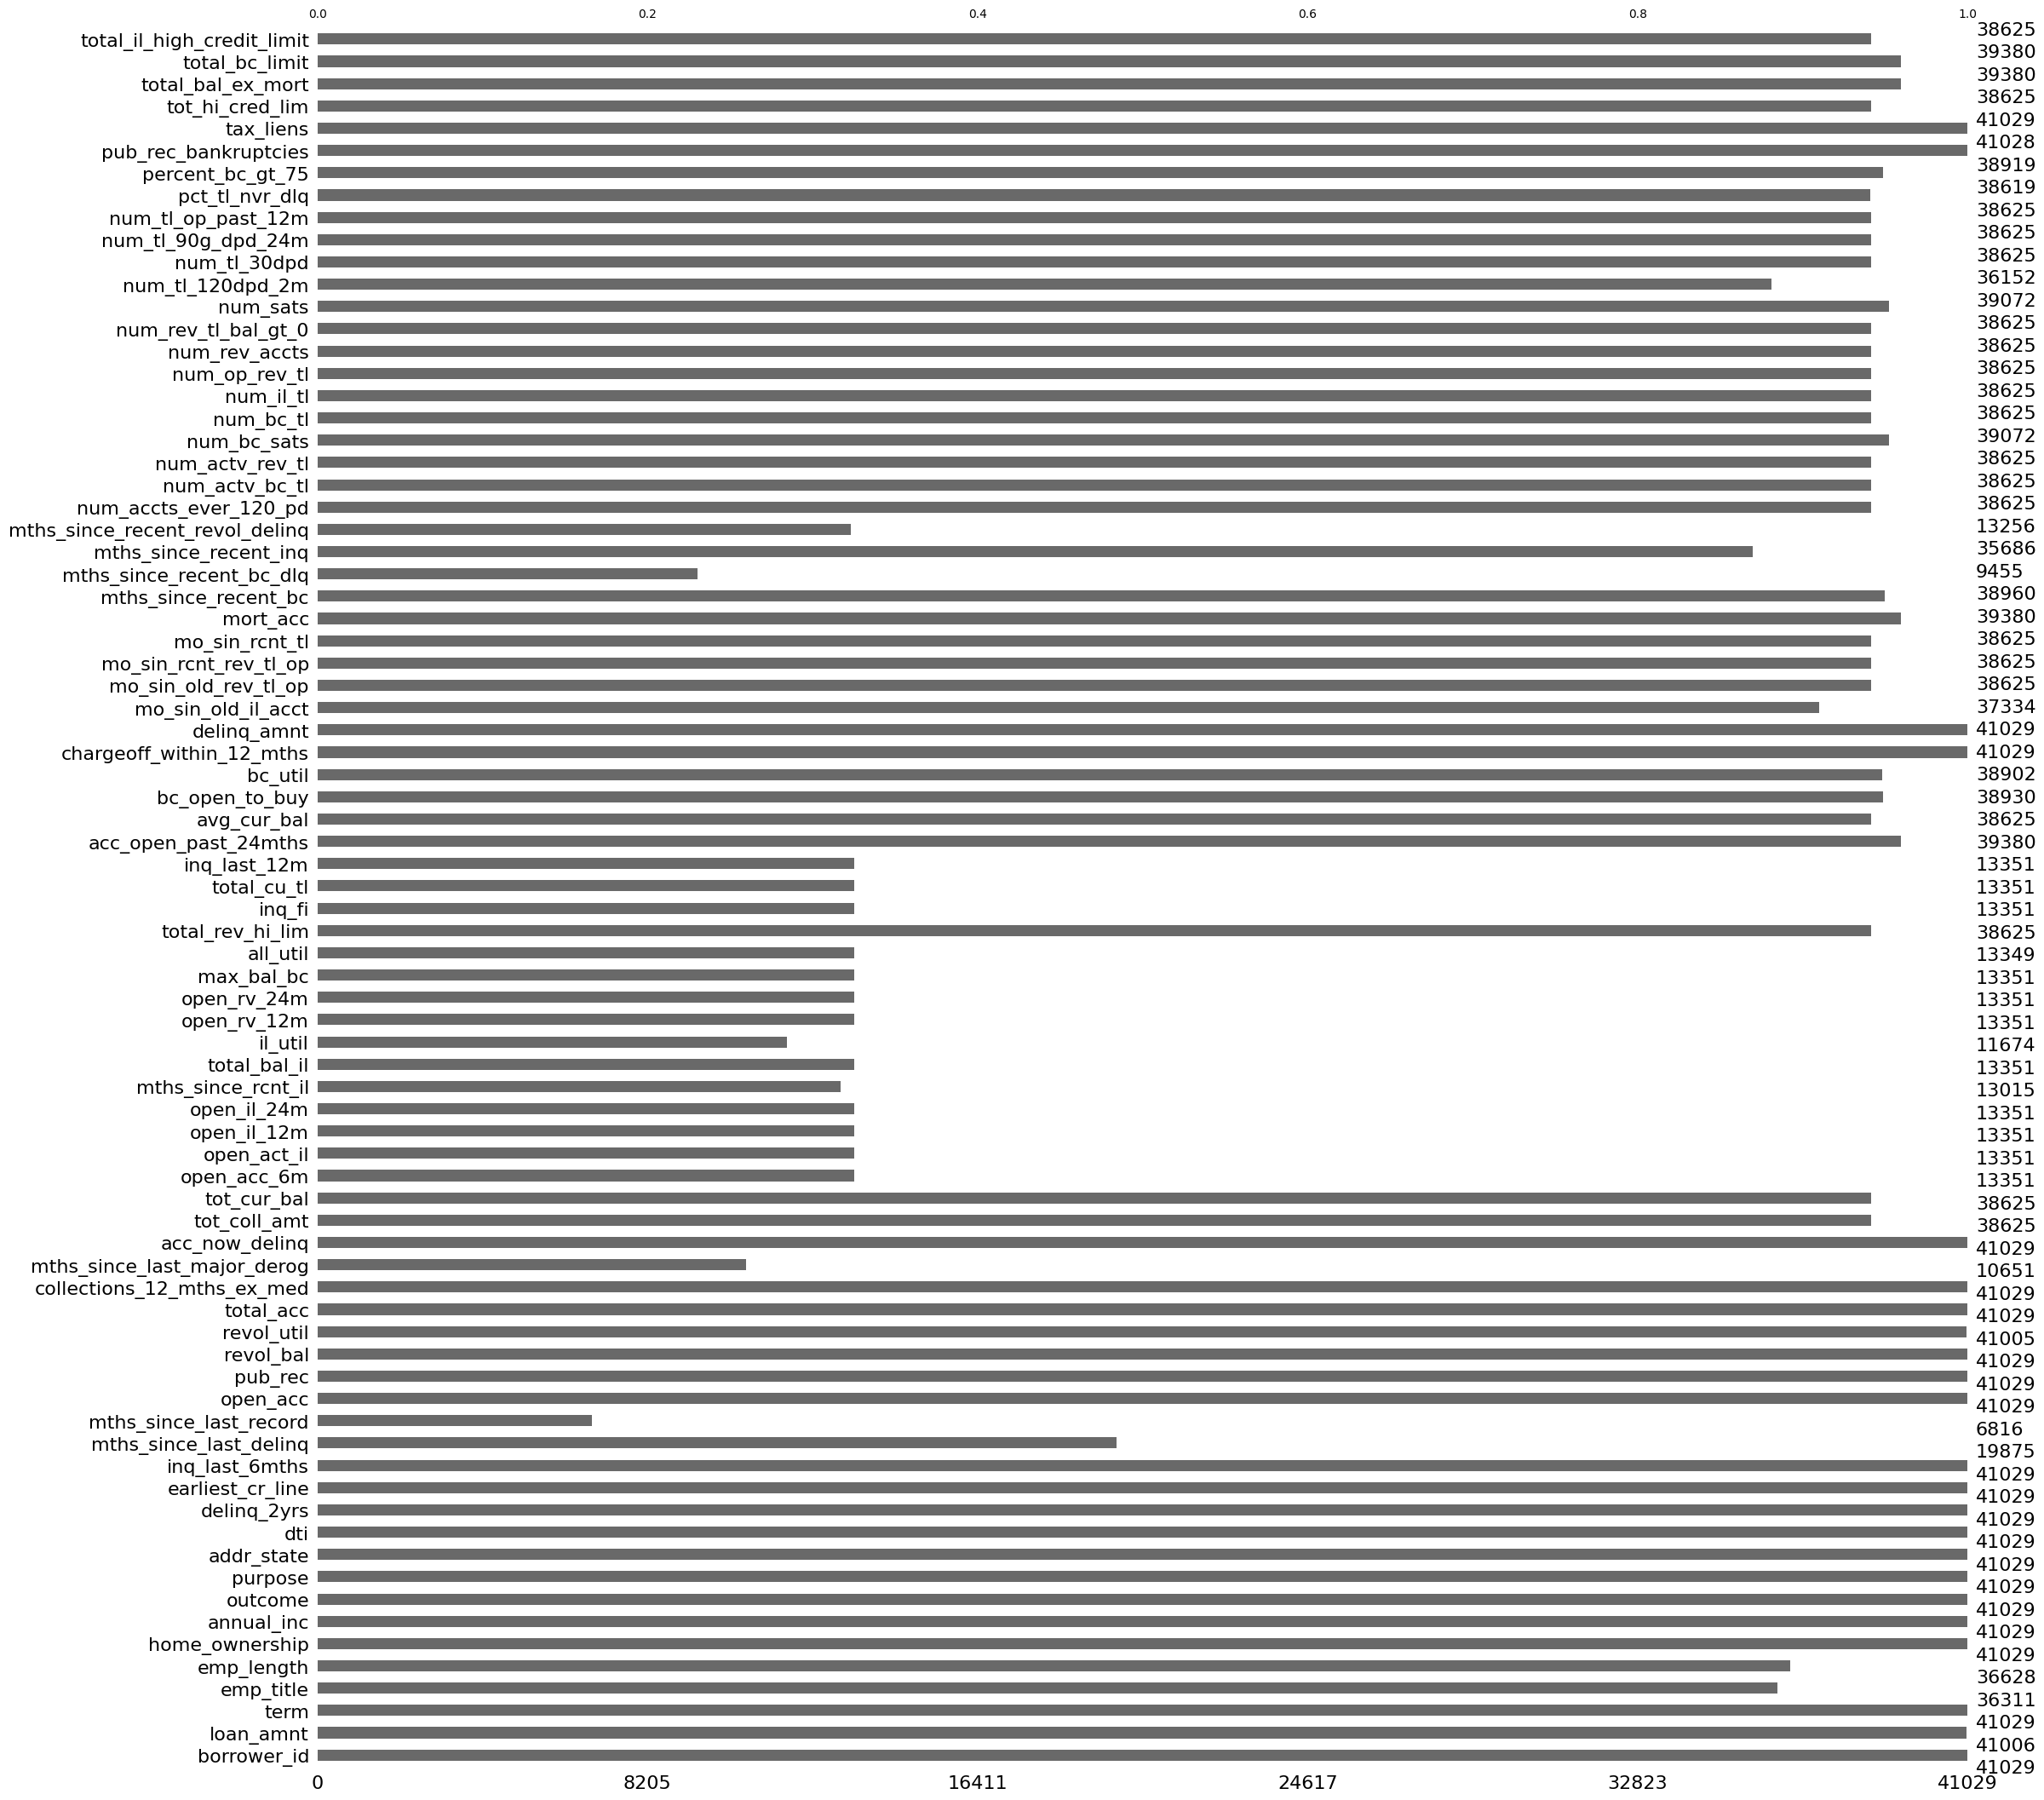

In [5]:
import missingno as msno

msno.bar(credit_data)

There are some features where a lot of data (>50%) is missing. They're not a huge fraction of the data we have (~42000 samples), but it might be useful to analyse whether the values are missing completely at random (MCAR), or have some other kind of missingness. This helps us decide whether we can just chuck the rows with missing data or it might be a better idea to impute the missing values in some way.

In [6]:
# Select categorical column
categorical_cols = [col for col in credit_data.columns if 
                   credit_data[col].dtype == 'object']

# Select numeric values
numeric_cols = [col for col in credit_data.columns if
                credit_data[col].dtype in ['int64', 'float64']]

In [7]:
print('These are the categorical columns:')
print(categorical_cols)
print('These are the numerical columns:')
print(numeric_cols)

These are the categorical columns:
['term', 'emp_title', 'emp_length', 'home_ownership', 'outcome', 'purpose', 'addr_state']
These are the numerical columns:
['borrower_id', 'loan_amnt', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_

As we can see, most of the columns are numerical. We can deal with them later. Let's see what the categorical columns look like.

In [8]:
credit_data[categorical_cols]

,term,emp_title,emp_length,home_ownership,outcome,purpose,addr_state
0,60 months,NaN,NaN,MORTGAGE,Fully Paid,home_improvement,SC
1,36 months,Graydon Head & Ritchey LLP,10+ years,MORTGAGE,Fully Paid,debt_consolidation,IN
2,36 months,Director of IT,3 years,RENT,Fully Paid,debt_consolidation,FL
3,36 months,NaN,NaN,MORTGAGE,Fully Paid,other,NY
4,36 months,NaN,NaN,RENT,Fully Paid,debt_consolidation,WA
...,...,...,...,...,...,...,...
41024,60 months,Community Manager,< 1 year,RENT,Fully Paid,debt_consolidation,NY
41025,36 months,Sandy plains baptist church,2 years,MORTGAGE,Fully Paid,debt_consolidation,NC
41026,36 months,Sales associate,7 years,RENT,Fully Paid,small_business,NY
41027,36 months,Professional Sales Representative,3 years,MORTGAGE,Fully Paid,debt_consolidation,VA


In [9]:
unique_counts = credit_data[categorical_cols].nunique()

print("Number of unique values for each categorical column:")
print(unique_counts)

Number of unique values for each categorical column:
term                  2
emp_title         20348
emp_length           11
home_ownership        6
outcome               2
purpose              14
addr_state           50
dtype: int64


As we can see, a couple of the categorical columns are high dimensionality (emp_title and addr_state), while the rest seem to have normal cardinality for our dataset. (~42000 samples)

In [10]:
credit_data['emp_title'].value_counts()

emp_title
Manager                     552
Teacher                     538
Supervisor                  264
Registered Nurse            236
RN                          230
                           ... 
Special Programs Auditor      1
LEAD CLERK                    1
Packaging                     1
City of Paris                 1
Signature Healthcare          1
Name: count, Length: 20348, dtype: int64

We have 20,000 unique values in the emp_title feature, which might lead us to believe that the feature is useless in terms of explaining any variance in the data. But as we can see above, there are abiout 500 people each with titles 'Manager' and 'Teacher', and other professions in the hundreds. Given that we only have ~1000 defaulters in our dataset, this feature might be important for the predictive power of our model. Since both our high-cardinality feature and our target variable are categorical, we could check their dependence (or independence) with a chi squared test.

In [11]:
%pip install scipy
from scipy.stats import chi2_contingency

# Create a contingency table between the high cardinality feature and the target variable
contingency_table = pd.crosstab(credit_data['emp_title'], credit_data['outcome'])

# Perform the chi-square test for independence
chi2_statistic, p_value, _, _ = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-square statistic: {chi2_statistic}")
print(f"p-value: {p_value}")

if p_value < 0.05:
    print("There is a significant association between the feature and the target variable.")
else:
    print("There is no significant association between the feature and the target variable.")


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Chi-square statistic: 20046.447661360042
p-value: 0.9324100132572164
There is no significant association between the feature and the target variable.


Since there is no significant association here, we can afford to drop the feature for now. That leaves us with one high cardinality feature, two ordinal features (term and emp_length), and three nominal features. We can use different categorical encoders to encode all of these categorical features. Before we do that though, we might want to impute the missing values in these columns with the most frequent value.

In [12]:
categorical_cols.remove('emp_title')
categorical_cols

['term', 'emp_length', 'home_ownership', 'outcome', 'purpose', 'addr_state']

In [13]:
from sklearn.impute import SimpleImputer

cat_imputer = SimpleImputer(strategy='most_frequent')
for col in categorical_cols:
    # Convert the Series to a DataFrame with a single column
    col_data = credit_data[[col]]
    # Impute the missing values in the single-column DataFrame
    credit_data.loc[:, col] = cat_imputer.fit_transform(col_data)

In [14]:
credit_data[categorical_cols].isnull().sum()

term              0
emp_length        0
home_ownership    0
outcome           0
purpose           0
addr_state        0
dtype: int64

Since we can't drop all rows with missing data (the bar chart displaying the missing data suggests we would cut down our data by a lot), we can impute the numerical columns with the SimpleImputer. Usually, features with a skewed distribution do better when imputed with the median, and features with more normal distributions can be imputed with the mean. Since we have a lot of features, accomplishing this process manually is not ideal. We could try to automate it instead by deciding on a skewness threshold and calculating it for each column.

In [15]:
from scipy.stats import skew

# Calculate skewness for each numerical feature
skewness = credit_data[numeric_cols].apply(lambda x: skew(x.dropna()))

# Define a threshold for skewness (e.g., 0.5)
skewness_threshold = 0.5

# Identify skewed and non-skewed features based on the threshold
skewed_features = skewness[skewness > skewness_threshold].index
non_skewed_features = skewness[skewness <= skewness_threshold].index

# Impute missing values with mean for non-skewed features and median for skewed features
imputer = SimpleImputer(strategy='mean')  # Use mean for non-skewed features
credit_data[non_skewed_features] = imputer.fit_transform(credit_data[non_skewed_features])

imputer = SimpleImputer(strategy='median')  # Use median for skewed features
credit_data[skewed_features] = imputer.fit_transform(credit_data[skewed_features])


In [16]:
credit_data.isnull().sum()

borrower_id                      0
loan_amnt                        0
term                             0
emp_title                     4718
emp_length                       0
                              ... 
tax_liens                        0
tot_hi_cred_lim                  0
total_bal_ex_mort                0
total_bc_limit                   0
total_il_high_credit_limit       0
Length: 78, dtype: int64

In [17]:
preprocessed_data = credit_data.drop(columns=['emp_title'])

We've preprocessed the data now and can move onto some exploratory data analysis to get a sense of what we're working with.

### Exploratory data analysis

<Axes: xlabel='outcome', ylabel='Count'>

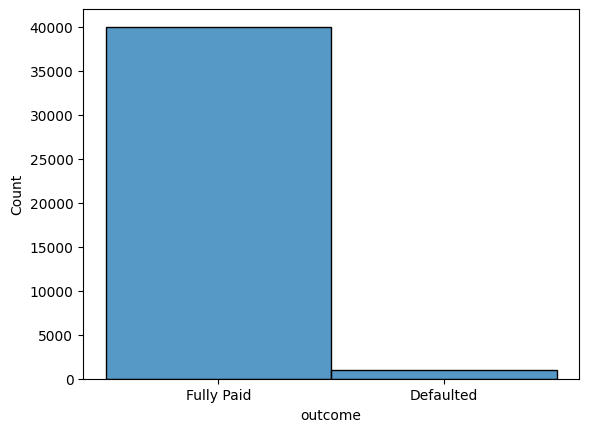

In [18]:
sns.histplot(preprocessed_data['outcome'])

As the histogram shows, we have much, much fewer examples of defaulters than we do of those who fully paid back the loans. Such an imbalance in class can cause difficulties with the model, since the model learns on many more samples of one class than the other. There are some ways to deal with this - oversampling with methods like SMOTE, using class weighting in scikit-learn, etc.

We have one feature (earliest_cr_line) which is of the datetime format. These don't play well while training models, and we have to extract information we think is relevant from them. 

In [19]:
preprocessed_data['year'] = preprocessed_data['earliest_cr_line'].dt.year
preprocessed_data['month'] = preprocessed_data['earliest_cr_line'].dt.month
preprocessed_data = preprocessed_data.drop(columns=['earliest_cr_line'])

In [20]:
preprocessed_data.head()

,borrower_id,loan_amnt,term,emp_length,home_ownership,annual_inc,outcome,purpose,addr_state,dti,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,year,month
0,537185.0,16075.0,60 months,10+ years,MORTGAGE,50289.0,Fully Paid,home_improvement,SC,12.27,...,95.7,100.0,0.0,0.0,227376.0,15756.0,11900.0,6000.0,2001,6
1,1810804.0,8000.0,36 months,10+ years,MORTGAGE,64000.0,Fully Paid,debt_consolidation,IN,19.93,...,100.0,75.0,1.0,0.0,121881.0,33618.0,13700.0,29400.0,1998,9
2,388855.0,23700.0,36 months,3 years,RENT,88000.0,Fully Paid,debt_consolidation,FL,29.80,...,100.0,10.0,1.0,0.0,99201.0,58898.0,18700.0,69501.0,2006,10
3,1137067.0,1200.0,36 months,10+ years,MORTGAGE,81000.0,Fully Paid,other,NY,12.87,...,83.3,100.0,0.0,0.0,203983.0,20609.0,1100.0,26183.0,2001,1
4,14585.0,3500.0,36 months,10+ years,RENT,11736.0,Fully Paid,debt_consolidation,WA,31.39,...,100.0,100.0,1.0,0.0,16200.0,9459.0,2000.0,0.0,2004,5


We can see some features which will likely end up having a correlation with whether the loan is paid, like annual income and employment length. But we can't say for sure at this point. We can look at the correlation between all the numerical features and see what shows up.

<Axes: >

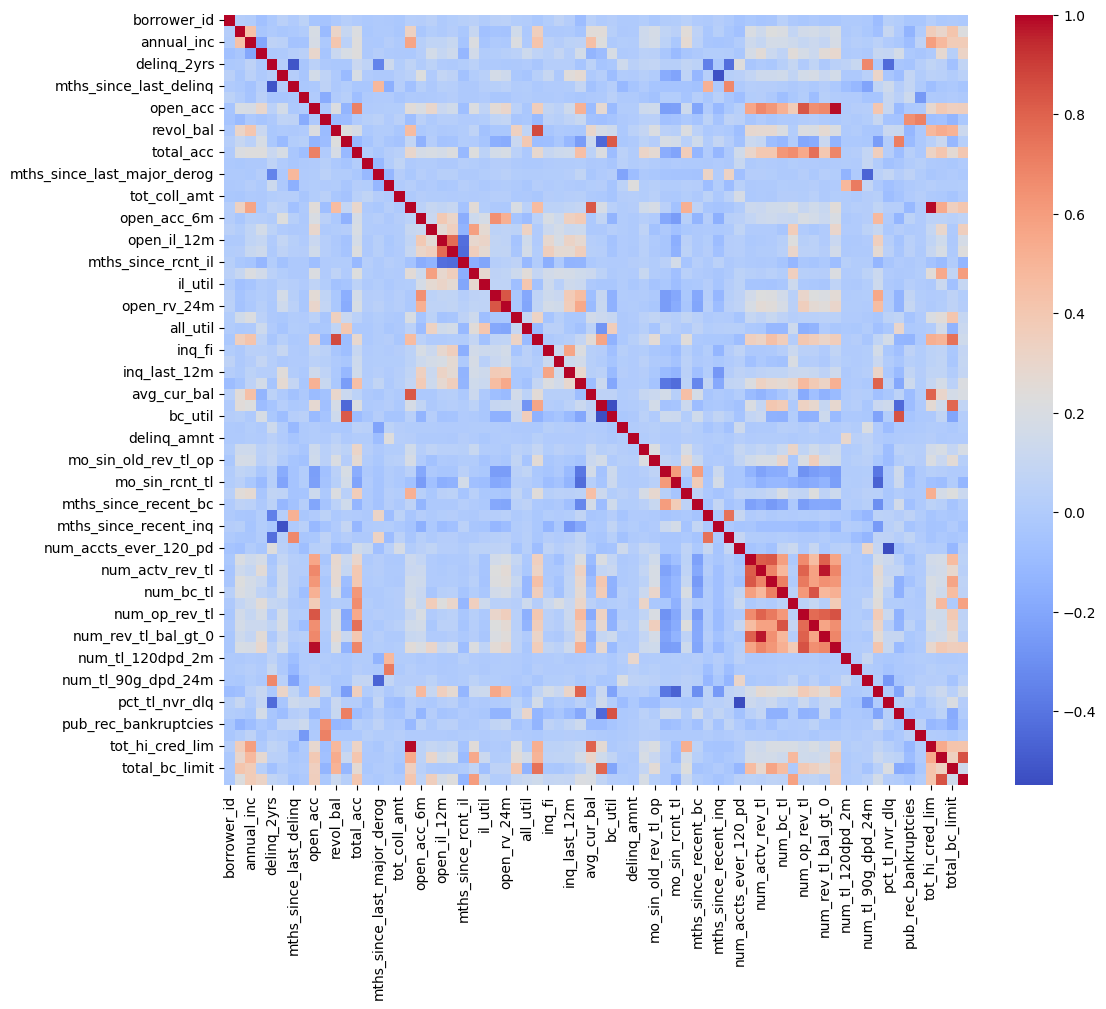

In [21]:
plt.figure(figsize=(12, 10))
sns.heatmap(preprocessed_data[numeric_cols].corr(), annot=False, cmap='coolwarm', fmt=".2f",) 

Some of these features do show some correlation, but there are too many for us to manually select or drop. We could use automatic feature selection of some sort.

### Feature Selection

In [22]:
from sklearn.model_selection import train_test_split

X, y = preprocessed_data.drop(columns=['outcome']), preprocessed_data['outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [23]:
#Compute the correlation matrix
corr_matrix = X_train[numeric_cols].corr().abs()

#Identify highly correlated features
corr_threshold = 0.7
highly_correlated_pairs = [(i, j) for i in range(corr_matrix.shape[1]) for j in range(i+1, corr_matrix.shape[1]) if corr_matrix.iloc[i, j] >= corr_threshold]

# keep one feature from each pair
selected_features = set(range(len(numeric_cols)))
for i, j in highly_correlated_pairs:
    if i in selected_features and j in selected_features:
        selected_features.remove(j)

selected_features_names = [numeric_cols[i] for i in selected_features]
X_selected = X_train[selected_features_names]
print(len(selected_features_names))

52


We're still left with 52 features, which is a lot. We could try further feature selection with a machine learning model.

In [24]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

#splitting the training data further into training proper and validation sets
X_train_proper, X_val, y_train_proper, y_val = train_test_split(X_selected, y_train, test_size=0.2, random_state=42, stratify=y_train)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
selector = SelectFromModel(clf)
selector.fit(X_train_proper, y_train_proper)
selected_features_names = X_selected.columns[selector.get_support()]

# Final selected features
print("Selected features after correlation-based feature selection:")
print(selected_features_names)

Selected features after correlation-based feature selection:
Index(['borrower_id', 'loan_amnt', 'annual_inc', 'dti',
       'mths_since_last_delinq', 'open_acc', 'revol_bal', 'revol_util',
       'total_acc', 'tot_cur_bal', 'acc_open_past_24mths', 'bc_open_to_buy',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mths_since_recent_bc', 'mths_since_recent_inq',
       'num_actv_bc_tl', 'num_bc_tl', 'num_il_tl', 'total_bal_ex_mort'],
      dtype='object')


These are a decent number of numerical features. We can now get onto encoding the categorical features.

### Encoding

In [25]:
categorical_cols.remove('outcome')

In [26]:
print('Numerical features for model training:')
print(selected_features_names)
print('categorical feature for model training')
print(categorical_cols)

Numerical features for model training:
Index(['borrower_id', 'loan_amnt', 'annual_inc', 'dti',
       'mths_since_last_delinq', 'open_acc', 'revol_bal', 'revol_util',
       'total_acc', 'tot_cur_bal', 'acc_open_past_24mths', 'bc_open_to_buy',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mths_since_recent_bc', 'mths_since_recent_inq',
       'num_actv_bc_tl', 'num_bc_tl', 'num_il_tl', 'total_bal_ex_mort'],
      dtype='object')
categorical feature for model training
['term', 'emp_length', 'home_ownership', 'purpose', 'addr_state']


In [27]:
ordinal_cols = ['term', 'emp_length']
nominal_cols = ['home_ownership', 'purpose']
high_cardinality_cols = ['addr_state']

In [28]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
import category_encoders as ce

#used to encode the target variable
label_encoder = LabelEncoder() 
y_enc = label_encoder.fit_transform(y)
print(y_enc.shape, y_enc)

(41029,) [1 1 1 ... 1 1 1]


In [29]:
ordinal_encoder = OrdinalEncoder()
# Transform the features, and join to dataframe
ordinal_cols_encoded = ordinal_encoder.fit_transform( X[ordinal_cols] )
ordinal_cols_df = pd.DataFrame(ordinal_cols_encoded, columns=ordinal_cols)
print(ordinal_cols_df)

       term  emp_length
0       1.0         1.0
1       0.0         1.0
2       0.0         3.0
3       0.0         1.0
4       0.0         1.0
...     ...         ...
41024   1.0        10.0
41025   0.0         2.0
41026   0.0         7.0
41027   0.0         3.0
41028   0.0         0.0

[41029 rows x 2 columns]


In [30]:
X_ordinal_encoded = pd.concat([X.drop(columns = ordinal_cols), ordinal_cols_df], axis=1)
print(X_ordinal_encoded)

       borrower_id  loan_amnt home_ownership  annual_inc             purpose  \
0         537185.0    16075.0       MORTGAGE     50289.0    home_improvement   
1        1810804.0     8000.0       MORTGAGE     64000.0  debt_consolidation   
2         388855.0    23700.0           RENT     88000.0  debt_consolidation   
3        1137067.0     1200.0       MORTGAGE     81000.0               other   
4          14585.0     3500.0           RENT     11736.0  debt_consolidation   
...            ...        ...            ...         ...                 ...   
41024     144002.0    18000.0           RENT     70000.0  debt_consolidation   
41025    1903558.0    23275.0       MORTGAGE     75036.0  debt_consolidation   
41026     333664.0     1775.0           RENT     25000.0      small_business   
41027    1197930.0    15000.0       MORTGAGE     80000.0  debt_consolidation   
41028    1807816.0    11300.0           RENT     90000.0            vacation   

      addr_state    dti  delinq_2yrs  i

In [31]:
onehot_encoder = OneHotEncoder(sparse_output = False)

# Fit and transform the encoder on the specified columns
encoded_values = onehot_encoder.fit_transform(X_ordinal_encoded[nominal_cols])

# Get feature names
feature_names = onehot_encoder.get_feature_names_out(input_features=nominal_cols)

# Convert the encoded values into a DataFrame with custom feature names
encoded_df = pd.DataFrame(encoded_values, columns=feature_names)

# Concatenate the encoded DataFrame with the original DataFrame
df_nominal_encoded = pd.concat([X_ordinal_encoded, encoded_df], axis=1)

# Drop the original columns
df_nominal_encoded.drop(nominal_cols, axis=1, inplace=True)

print(df_nominal_encoded)

       borrower_id  loan_amnt  annual_inc addr_state    dti  delinq_2yrs  \
0         537185.0    16075.0     50289.0         SC  12.27          0.0   
1        1810804.0     8000.0     64000.0         IN  19.93          0.0   
2         388855.0    23700.0     88000.0         FL  29.80          0.0   
3        1137067.0     1200.0     81000.0         NY  12.87          1.0   
4          14585.0     3500.0     11736.0         WA  31.39          0.0   
...            ...        ...         ...        ...    ...          ...   
41024     144002.0    18000.0     70000.0         NY  12.72          0.0   
41025    1903558.0    23275.0     75036.0         NC   3.79          0.0   
41026     333664.0     1775.0     25000.0         NY  29.43          0.0   
41027    1197930.0    15000.0     80000.0         VA   9.74          0.0   
41028    1807816.0    11300.0     90000.0         MA  22.69          0.0   

       inq_last_6mths  mths_since_last_delinq  mths_since_last_record  \
0             

In [32]:
#finally for the high cardinality feature

high_cardinality_cols
count_encoder = ce.CountEncoder()
# Transform the features, rename the columns with the _count suffix, and join to dataframe
count_encoded = count_encoder.fit_transform( df_nominal_encoded[high_cardinality_cols] )
df_encoded = df_nominal_encoded.join(count_encoded.add_suffix("_count"))
df_encoded.drop(high_cardinality_cols, axis=1, inplace=True)
print(df_encoded)

       borrower_id  loan_amnt  annual_inc    dti  delinq_2yrs  inq_last_6mths  \
0         537185.0    16075.0     50289.0  12.27          0.0             0.0   
1        1810804.0     8000.0     64000.0  19.93          0.0             0.0   
2         388855.0    23700.0     88000.0  29.80          0.0             2.0   
3        1137067.0     1200.0     81000.0  12.87          1.0             0.0   
4          14585.0     3500.0     11736.0  31.39          0.0             0.0   
...            ...        ...         ...    ...          ...             ...   
41024     144002.0    18000.0     70000.0  12.72          0.0             0.0   
41025    1903558.0    23275.0     75036.0   3.79          0.0             0.0   
41026     333664.0     1775.0     25000.0  29.43          0.0             1.0   
41027    1197930.0    15000.0     80000.0   9.74          0.0             1.0   
41028    1807816.0    11300.0     90000.0  22.69          0.0             2.0   

       mths_since_last_deli

We have finally converted all our features into numerical ones

In [33]:
column_to_keep = selected_features_names.append(pd.Index(categorical_cols))
print(column_to_keep)

Index(['borrower_id', 'loan_amnt', 'annual_inc', 'dti',
       'mths_since_last_delinq', 'open_acc', 'revol_bal', 'revol_util',
       'total_acc', 'tot_cur_bal', 'acc_open_past_24mths', 'bc_open_to_buy',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mths_since_recent_bc', 'mths_since_recent_inq',
       'num_actv_bc_tl', 'num_bc_tl', 'num_il_tl', 'total_bal_ex_mort', 'term',
       'emp_length', 'home_ownership', 'purpose', 'addr_state'],
      dtype='object')


In [39]:
type(column_to_keep)

pandas.core.indexes.base.Index

In [41]:
features_removed_by_encoding = ['home_ownership', 'purpose', 'addr_state']
column_to_keep = column_to_keep.drop(features_removed_by_encoding)
column_to_keep

Index(['borrower_id', 'loan_amnt', 'annual_inc', 'dti',
       'mths_since_last_delinq', 'open_acc', 'revol_bal', 'revol_util',
       'total_acc', 'tot_cur_bal', 'acc_open_past_24mths', 'bc_open_to_buy',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mths_since_recent_bc', 'mths_since_recent_inq',
       'num_actv_bc_tl', 'num_bc_tl', 'num_il_tl', 'total_bal_ex_mort', 'term',
       'emp_length'],
      dtype='object')

### Model Training and Selection

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score

X_feature_selected = df_encoded[column_to_keep]

X_train, X_test, y_train, y_test = train_test_split(X_feature_selected, y_enc, test_size=0.2, random_state=42, stratify=y_enc)

rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)

RandomForestClassifier()

In [43]:
y_pred_rf = rf_model.predict(X_test)
print("-------------------------TEST SCORES-----------------------") 
print("-------------------------Random Forest-----------------------") 
print(f"Recall: { round(recall_score(y_test, y_pred_rf)*100, 4) }")
print(f"Precision: { round(precision_score(y_test, y_pred_rf)*100, 4) }")
print(f"F1-Score: { round(f1_score(y_test, y_pred_rf)*100, 4) }")
print(f"Accuracy score: { round(accuracy_score(y_test, y_pred_rf)*100, 4) }")
print(f"AUC Score: { round(roc_auc_score(y_test, y_pred_rf)*100, 4) }")

-------------------------TEST SCORES-----------------------
-------------------------Random Forest-----------------------
Recall: 100.0
Precision: 97.5628
F1-Score: 98.7663
Accuracy score: 97.5628
AUC Score: 50.0


We have high accuracy and 100% recall, but our AUC score is just 50. This means our model is no better than random guessing. This can happen when a model predicts one class for all the samples.

In [44]:
from sklearn.utils.class_weight import compute_class_weight

# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_enc), y=y_enc)
print(class_weights)

[20.5145      0.51249094]


In [45]:
def get_model_metrics(y_test, y_pred, model_name):
    print("-------------------------TEST SCORES-----------------------") 
    print(f"-------------------------{model_name}-----------------------") 
    print(f"Recall: { round(recall_score(y_test, y_pred)*100, 4) }")
    print(f"Precision: { round(precision_score(y_test, y_pred)*100, 4) }")
    print(f"F1-Score: { round(f1_score(y_test, y_pred)*100, 4) }")
    print(f"Accuracy score: { round(accuracy_score(y_test, y_pred)*100, 4) }")
    print(f"AUC Score: { round(roc_auc_score(y_test, y_pred)*100, 4) }")

In [46]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report

# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Resample the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Instantiate the classifier with class weights
clf = RandomForestClassifier(class_weight={0: class_weights[0], 1: class_weights[1]})

# Train the classifier
clf.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the classifier
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       200
           1       0.98      1.00      0.99      8006

    accuracy                           0.97      8206
   macro avg       0.49      0.50      0.49      8206
weighted avg       0.95      0.97      0.96      8206



In [47]:
get_model_metrics(y_test, y_pred, 'Random Forest with Class Weights and SMOTE')

-------------------------TEST SCORES-----------------------
-------------------------Random Forest with Class Weights and SMOTE-----------------------
Recall: 99.7002
Precision: 97.5556
F1-Score: 98.6163
Accuracy score: 97.2703
AUC Score: 49.8501


We're getting pretty bad scores in terms of the AUC still, even after using SMOTE and class weights. It might be a good idea to try out other models and maybe try under/oversampling.

In [48]:
%pip install xgboost
from xgboost import XGBClassifier
xg_model = XGBClassifier()
xg_model.fit(X_train, y_train)
y_pred_xgb = xg_model.predict(X_test)

get_model_metrics(y_test, y_pred_xgb, 'XGBoost')


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
-------------------------TEST SCORES-----------------------
-------------------------XGBoost-----------------------
Recall: 99.9625
Precision: 97.5738
F1-Score: 98.7537
Accuracy score: 97.5384
AUC Score: 50.2313


XGBoost did a little better than random guessing, but that could be a fluke.

In [49]:
pd.Series(y_train).value_counts()

1    32023
0      800
Name: count, dtype: int64

None of these methods are giving us a better AUC score. We have to consider that there's a problem with our metrics of measurement. Stratified CV is another method which might address this. Since we have a huge class imbalance, random sampling (as we do with train_test_split) might get much fewer samples of one class in the training data than we might have in our inference distribution. This leads to inaccurate generalisation approximation. Stratified CV deals with this by taking samples from the data for each fold according to the proportion of classes in our target variable.

In [50]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

classifier = RandomForestClassifier(class_weight={0: class_weights[0], 1: class_weights[1]})

# Initialize StratifiedKFold with number of folds
k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(classifier, X_train, y_train, cv=k_fold, scoring='roc_auc')

print("Cross-validation AUC scores:", cv_scores)
print("Mean AUC score:", cv_scores.mean())


Cross-validation AUC scores: [0.59478435 0.58707894 0.56406274 0.57830409 0.56578115]
Mean AUC score: 0.5780022548084214


Now we're getting an AUC score of 58, which is not great, but also isn't as bad as before. It also tells us that the issue with the performance of our model might be the sampling of the data.

### Oversampling minority class

In [53]:
import numpy as np
from sklearn.utils import resample
#
# Create oversampled training data set for minority class
#
X_oversampled, y_oversampled = resample(X_feature_selected[y_enc == 0],
                                        y_enc[y_enc == 0],
                                        replace=True,
                                        n_samples=X_feature_selected[y_enc == 1].shape[0],
                                        random_state=123)
 
# Append the oversampled minority class to the imbalanced data and related labels
X_balanced = np.vstack((X_feature_selected[y_enc == 1], X_oversampled))
y_balanced = np.hstack((y_enc[y_enc == 1], y_oversampled))

In [54]:
classifier = RandomForestClassifier(class_weight={0: class_weights[0], 1: class_weights[1]})

# Initialize StratifiedKFold with number of folds
k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(classifier, X_balanced, y_balanced, cv=k_fold, scoring='roc_auc')

print("Cross-validation AUC scores:", cv_scores)
print("Mean AUC score:", cv_scores.mean())

Cross-validation AUC scores: [1. 1. 1. 1. 1.]
Mean AUC score: 1.0


In [55]:
X_balanced.shape

(80058, 24)

By oversampling the minority class, we're getting an AUC of 1, which makes sense, since we have too many duplicates of the minority class and the model must have overfit to our data.

### Undersampling majority class

In [56]:
# Downsample the majority class (class 1) to match the minority class count
X_majority_downsampled, y_majority_downsampled = resample(
    X_feature_selected[y_enc == 1],  # Select only the majority class instances
    y_enc[y_enc == 1],  # Corresponding labels
    replace=False,  # No replacement, as this is downsampling
    n_samples=len(y_enc[y_enc == 0]),  # The number of samples to match the minority class
    random_state=42
)
 
# Combine the downsampled majority class with the original minority class
X_undersampled = np.vstack((X_feature_selected[y_enc == 0], X_majority_downsampled))
y_undersampled = np.hstack((y_enc[y_enc == 0], y_majority_downsampled))

In [57]:
class_weights={0: class_weights[0], 1: class_weights[1]}
classifier = RandomForestClassifier(class_weight=class_weights)

# Initialize StratifiedKFold with number of folds
k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(classifier, X_undersampled, y_undersampled, cv=k_fold, scoring='roc_auc')

print("Cross-validation AUC scores:", cv_scores)
print("Mean AUC score:", cv_scores.mean())

Cross-validation AUC scores: [0.59593055 0.59203535 0.60967025 0.61406039 0.58220675]
Mean AUC score: 0.5987806571757628


In [58]:
classifier = XGBClassifier()

# Initialize StratifiedKFold with number of folds
k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(classifier, X_undersampled, y_undersampled, cv=k_fold, scoring='roc_auc')

print("Cross-validation AUC scores:", cv_scores)
print("Mean AUC score:", cv_scores.mean())

Cross-validation AUC scores: [0.57260742 0.58471553 0.60778041 0.60676305 0.58036477]
Mean AUC score: 0.5904462369415941


As we've seen above, oversampling the minority class to match the majority class results in an AUC close to 1, which means our model is overfitting. Undersampling the majority class so that we only used 2k samples as opposed to all 42k resulted in an AUC score between 60 and 65, which is a good increase from the previous 0.5, but not enough. We might be able to get good results if we use a combination of undersampling the majority class to a certain extent, SMOTE to produce synthetic examples of the minority class, and class weighting.

### Undersampling + Synthetic Samples + Class weighting

In [66]:
def downsample_majority_class(proportion):
    """Return data with 1x minority class and proportionx majority class"""
    # Downsample the majority class (class 1) to match the minority class count
    X_majority_downsampled, y_majority_downsampled = resample(
        X_feature_selected[y_enc == 1],  # Select only the majority class instances
        y_enc[y_enc == 1],  # Corresponding labels
        replace=False,  # No replacement, as this is downsampling
        n_samples=round(len(y_enc[y_enc == 0]) * proportion),  # The number of samples to match the minority class
        random_state=42
    )
    
    # Combine the downsampled majority class with the original minority class
    X_undersampled = np.vstack((X_feature_selected[y_enc == 0], X_majority_downsampled))
    y_undersampled = np.hstack((y_enc[y_enc == 0], y_majority_downsampled))
    return X_undersampled, y_undersampled

In [67]:
# Instantiate SMOTE
smote = SMOTE(random_state=42)

#get undersampled data
MAJORITY_PROPORTION = 1.5
X_undersampled, y_undersampled = downsample_majority_class(MAJORITY_PROPORTION)

# Resample the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_undersampled, y_undersampled)

# Instantiate the classifier with class weights
clf = RandomForestClassifier(class_weight='balanced')

# Train the classifier
clf.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the classifier
print(classification_report(y_test, y_pred))
get_model_metrics(y_test,y_pred,'RF with undersampling of majority class + SMOTE + class weighting')

              precision    recall  f1-score   support

           0       0.08      1.00      0.15       200
           1       1.00      0.71      0.83      8006

    accuracy                           0.72      8206
   macro avg       0.54      0.86      0.49      8206
weighted avg       0.98      0.72      0.82      8206

-------------------------TEST SCORES-----------------------
-------------------------RF with undersampling of majority class + SMOTE + class weighting-----------------------
Recall: 71.3965
Precision: 100.0
F1-Score: 83.3115
Accuracy score: 72.0936
AUC Score: 85.6982


/Users/kevinvegda/.pyenv/versions/3.12.1/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Now we're getting a decent AUC score as well as (somewhat) decent accuracy. Let's try some other models.

In [68]:
def test_model(model, model_name):
    # Train the classifier
    model.fit(X_train_resampled, y_train_resampled)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the classifier
    get_model_metrics(y_test,y_pred,model_name)
    print(classification_report(y_test, y_pred))

In [69]:
xg_model = XGBClassifier()
test_model(xg_model, 'XGBoost')

-------------------------TEST SCORES-----------------------
-------------------------XGBoost-----------------------
Recall: 70.647
Precision: 100.0
F1-Score: 82.799
Accuracy score: 71.3624
AUC Score: 85.3235
              precision    recall  f1-score   support

           0       0.08      1.00      0.15       200
           1       1.00      0.71      0.83      8006

    accuracy                           0.71      8206
   macro avg       0.54      0.85      0.49      8206
weighted avg       0.98      0.71      0.81      8206



In [70]:
%pip install lightgbm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 690.1 kB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for lightgbm: filename=lightgbm-4.3.0-py3-none-macosx_14_0_arm64.whl size=1408564 sha256=a8612fe1b422035e8c60f012cdad8f85cd43169655a610f4c894d37b546733c1
  Stored in directory: /Users/kevinvegda/Library/Caches/pip/wheels/5f/b6/8e/2147c3932dcf4c69975fca6144cec78ef125bedd717ba975f3
Successfully built lightgbm

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [72]:
import lightgbm as lgb

params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': 'binary_logloss',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

train_data = lgb.Dataset(X_train_resampled, label=y_train_resampled)
test_data = lgb.Dataset(X_test, label=y_test)

num_round = 100
bst = lgb.train(params, train_data, num_round, valid_sets=[test_data])

y_pred = bst.predict(X_test, num_iteration=bst.best_iteration)
y_pred_binary = [1 if pred > 0.5 else 0 for pred in y_pred]

get_model_metrics(y_test, y_pred_binary, 'LightGBM')


-------------------------TEST SCORES-----------------------
-------------------------LightGBM-----------------------
Recall: 71.5089
Precision: 99.7039
F1-Score: 83.2848
Accuracy score: 71.9961
AUC Score: 81.5044


### Comparing Models

/Users/kevinvegda/.pyenv/versions/3.12.1/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


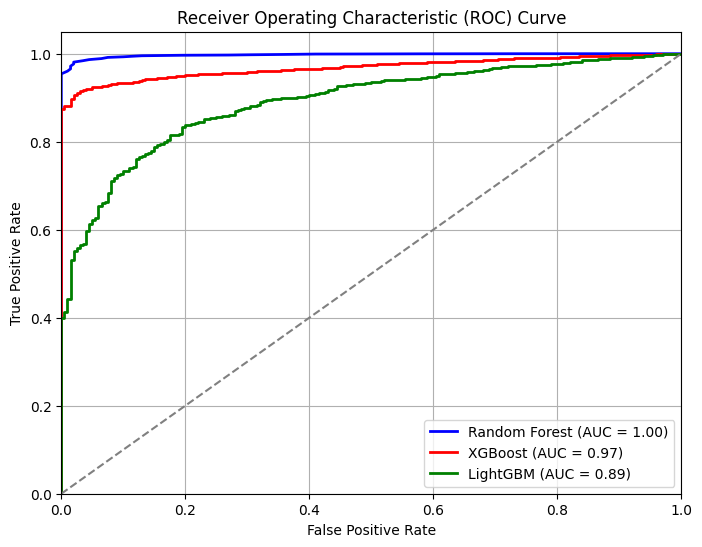

In [78]:
from sklearn.metrics import roc_curve, auc

rf_model = RandomForestClassifier(class_weight='balanced')

# Train the classifier
rf_model.fit(X_train_resampled, y_train_resampled)

# Calculate ROC curve and AUC for each model
fpr1, tpr1, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:,1])
roc_auc1 = auc(fpr1, tpr1)

fpr2, tpr2, _ = roc_curve(y_test, xg_model.predict_proba(X_test)[:,1])
roc_auc2 = auc(fpr2, tpr2)

fpr3, tpr3, _ = roc_curve(y_test, bst.predict(X_test))
roc_auc3 = auc(fpr3, tpr3)

# Plot ROC curve for each model
plt.figure(figsize=(8, 6))

plt.plot(fpr1, tpr1, color='blue', lw=2, label='Random Forest (AUC = %0.2f)' % roc_auc1)
plt.plot(fpr2, tpr2, color='red', lw=2, label='XGBoost (AUC = %0.2f)' % roc_auc2)
plt.plot(fpr3, tpr3, color='green', lw=2, label='LightGBM (AUC = %0.2f)' % roc_auc3)

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


/Users/kevinvegda/.pyenv/versions/3.12.1/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


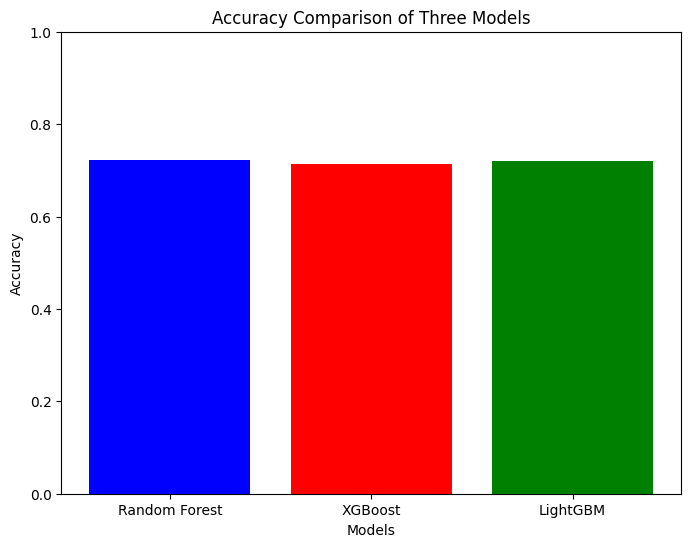

In [91]:
# Calculate accuracy scores for each model
accuracy_model1 = accuracy_score(y_test, rf_model.predict(X_test))
accuracy_model2 = accuracy_score(y_test, xg_model.predict(X_test))
accuracy_model3 = accuracy_score(y_test, list(map(round, bst.predict(X_test))))

# Plotting the accuracy scores
accuracy_scores = [accuracy_model1, accuracy_model2, accuracy_model3]
models = ['Random Forest', 'XGBoost', 'LightGBM']

plt.figure(figsize=(8, 6))
plt.bar(models, accuracy_scores, color=['blue', 'red', 'green'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Three Models')
plt.ylim(0, 1) 
plt.show()


Comparing the models on our test data, we can see that the Random Forest model is performing a little better than XGBoost in our case. We could do some hyperparameter tuning with it. The AUC of ~1 indicates an almost perfect classifier, while the accuracy of 0.73 suggests there were still misclassifications. This is likely due to the class imbalance in the data.

/Users/kevinvegda/.pyenv/versions/3.12.1/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


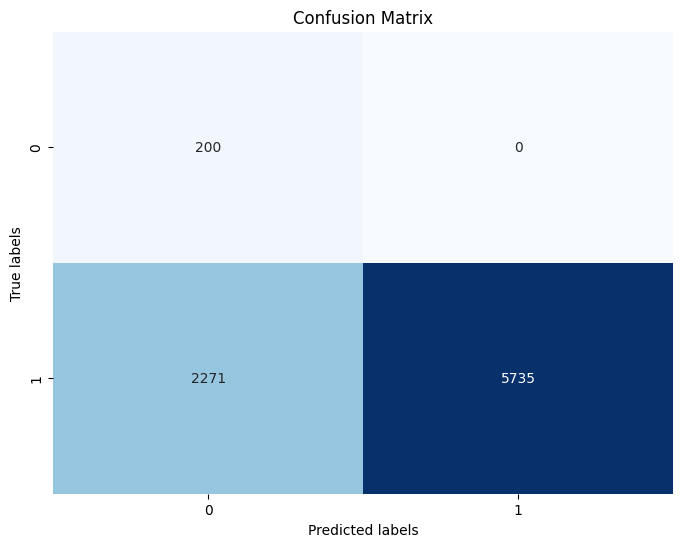

In [92]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, rf_model.predict(X_test))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


As we can see, all of the errors that the model made were while predicting 0 when the class was 1. i.e., the model predicted that we have a loan defaulter while we had someone who paid the loan. Thus, we have false positives. For some scenarios, false positives might be desirable if we also catch all the true positives. This really depends on the scenario.

### Hyperparam Tuning

In [93]:
from sklearn.model_selection import GridSearchCV

rf_classifier = RandomForestClassifier(class_weight='balanced')

# Define hyperparameters to search
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],   # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]      # Minimum number of samples required at each leaf node
}

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_resampled, y_train_resampled)

# Print best hyperparameters found
print("Best hyperparameters found:")
print(grid_search.best_params_)

# Evaluate model on test set
best_rf = grid_search.best_estimator_
test_accuracy = best_rf.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)

Best hyperparameters found:
{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Test Accuracy: 0.7354374847672435


/Users/kevinvegda/.pyenv/versions/3.12.1/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Seems like this is all the performance we can squeeze out of our Random Forest given our data. There are more advanced resampling methods we can use to address the class imbalance, but we'll leave that for later.

### Final model + Explainability

In [94]:
final_model = best_rf
test_model(final_model, 'Random forest with undersampling, SMOTE, and hyperparam tuning')

-------------------------TEST SCORES-----------------------
-------------------------Random forest with undersampling, SMOTE, and hyperparam tuning-----------------------
Recall: 73.4949
Precision: 100.0
F1-Score: 84.7228
Accuracy score: 74.1409
AUC Score: 86.7474
              precision    recall  f1-score   support

           0       0.09      1.00      0.16       200
           1       1.00      0.73      0.85      8006

    accuracy                           0.74      8206
   macro avg       0.54      0.87      0.50      8206
weighted avg       0.98      0.74      0.83      8206



/Users/kevinvegda/.pyenv/versions/3.12.1/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


100%|===================| 5976/6000 [04:02<00:00]        

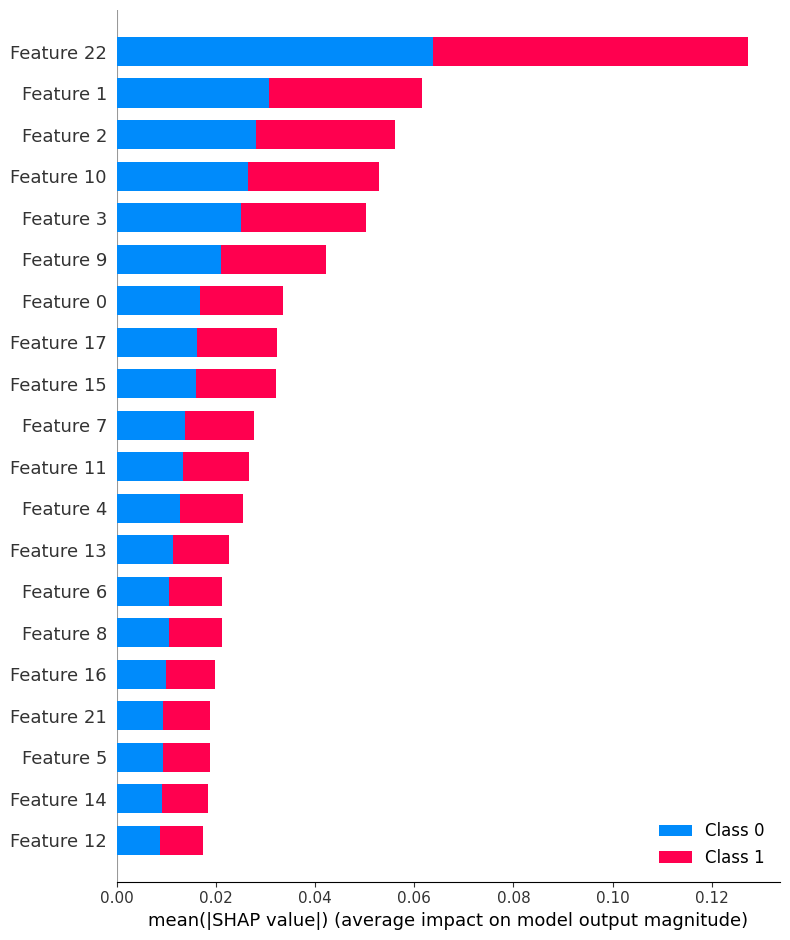

In [96]:
import shap

# Initialize explainer with the trained Random Forest model and training data
explainer = shap.Explainer(final_model, X_train_resampled)

# Calculate SHAP values
shap_values = explainer.shap_values(X_train_resampled, check_additivity=False)

# Visualize the SHAP summary plot
shap.summary_plot(shap_values, X_train_resampled, plot_type="bar")

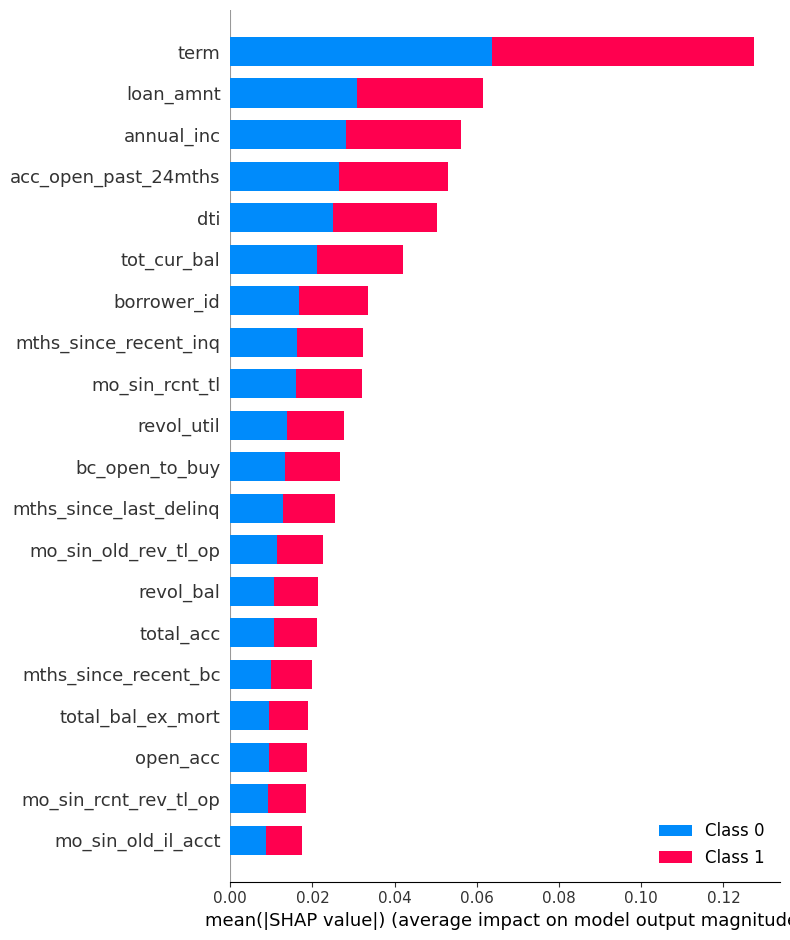

In [102]:
shap.summary_plot(shap_values, X_train_resampled, plot_type="bar", feature_names=X_train.columns)

As we can see, the largest effect on whether the loan is paid back is made by the term, loan amount, and annual income, as we guessed during the exploratory data analysis. Some other important features seem to be whether the account has been opened in the last 24 months, the debt-to-income ratio, the total current balance of all of their accounts, etc. These are predictable happenings. So our model gives predictions that are quite explainable.